In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shivamb_machine_predictive_maintenance_classification_path = kagglehub.dataset_download('shivamb/machine-predictive-maintenance-classification')

print('Data source import complete.')


100%|██████████| 137k/137k [00:00<00:00, 36.9MB/s]

Extracting files...
Data source import complete.


# About this project

This project revolves around using data from a manufacturing company's industrial devices. The data helps predict when these devices need maintenance, preventing breakdowns and saving money. As companies grow, keeping track of maintenance manually becomes hard. So, we propose a smart solution: using data from sensors to predict when maintenance is needed.

The goal is to analyze the data from these sensors to figure out the best time to do maintenance on the devices. We'll use advanced techniques to do this efficiently.

* UDI (Unique Device Identifier): A unique identifier for each device.
* Product ID: An identifier specific to the product.
* Type:  Categorized as L, M, or H representing low (50% of all products), medium (30%), and high (20%) product quality variants, each with a variant-specific serial number.
* Air Temperature [K]: The temperature of the surrounding air measured in Kelvin.
* Process Temperature [K]: The temperature of the manufacturing process measured in Kelvin.
* Rotational Speed [rpm]: The speed at which the device rotates, measured in revolutions per minute.
* Torque [Nm]: The torque applied to the device, measured in Newton-meters.
* Tool Wear [min]: The duration of tool usage, measured in minutes.
* Target (Machine Failure): An indicator of whether the machine has failed or not (Yes/No).
* Failure Type: Specifies the type of failure encountered.

By studying this data, we'll create accurate models to predict maintenance needs. This will help the company know when to fix their devices, reducing downtime and costs. Automating this process is a modern solution to the challenges of keeping up with maintenance as companies get bigger and their operations get more complex.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.rcdefaults()

In [ ]:
# data = pd.read_csv("/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv")
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("predictive_maintenance.csv")

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [ ]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
data.columns = ['UDI', 'Product ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'Failure type']

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature,10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [ ]:
data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000
Failure type,10000,6,No Failure,9652


# Exploratory Data Analysis

In [ ]:
num_cols = ['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear']
cat_cols = ['Type', 'Failure type']
label = 'Machine failure'

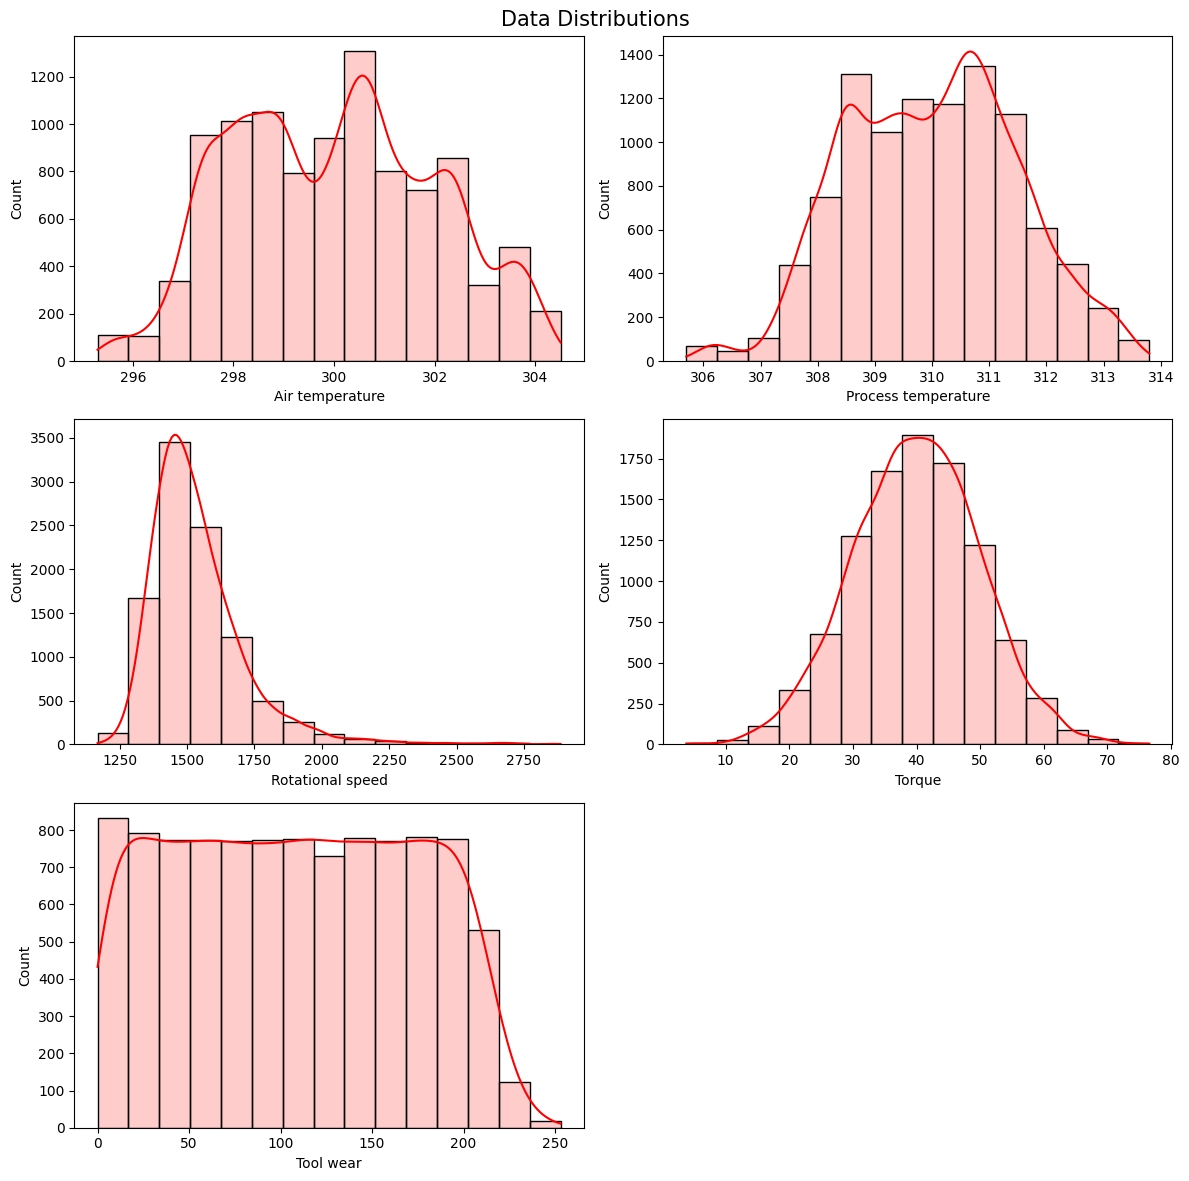

In [ ]:
plt.figure(figsize = (12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3,2, i+1)
    sns.histplot(data, x = col, kde = True, alpha = 0.2, color = 'red', bins = 15)
plt.suptitle("Data Distributions", fontsize = 15)
plt.tight_layout()
plt.show()

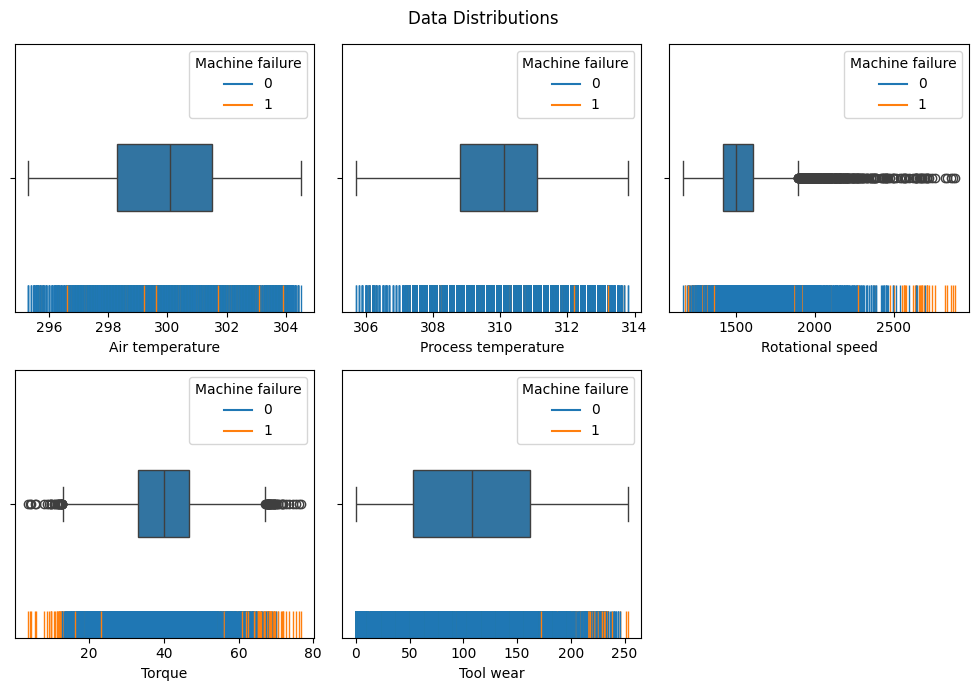

In [ ]:
plt.figure(figsize = (10, 7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.rugplot(data, x = col, hue = label, height = 0.1)
    sns.boxplot(data, x = col, width = 0.25)
plt.suptitle("Data Distributions")
plt.tight_layout()
plt.show()

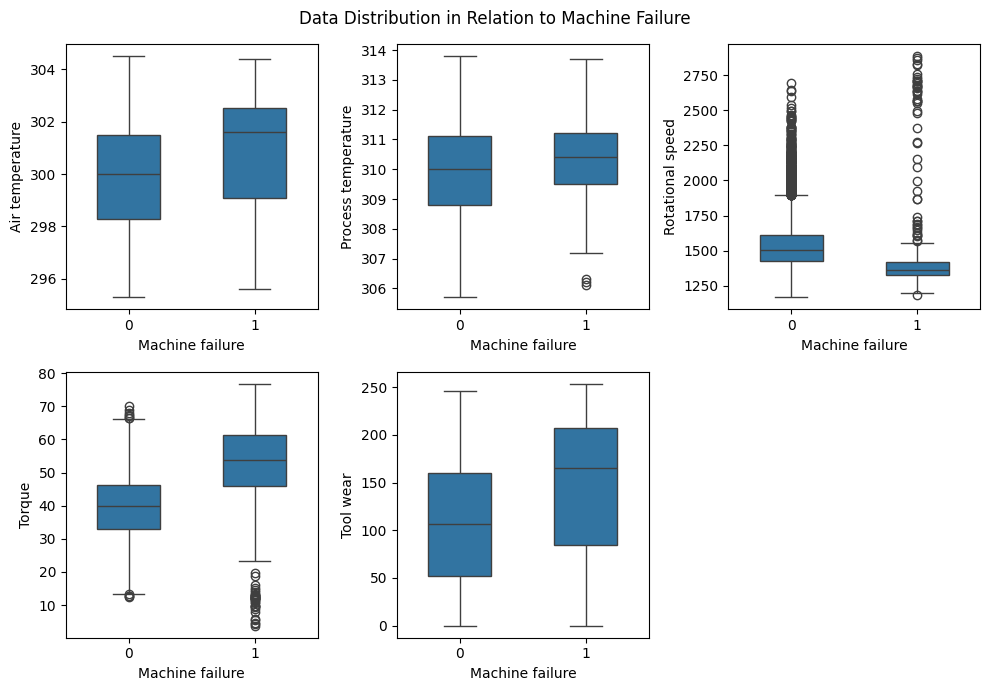

In [ ]:
plt.figure(figsize = (10, 7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.boxplot(data, x = label, y = col, width = 0.5)
plt.suptitle("Data Distribution in Relation to Machine Failure")
plt.tight_layout()
plt.show()

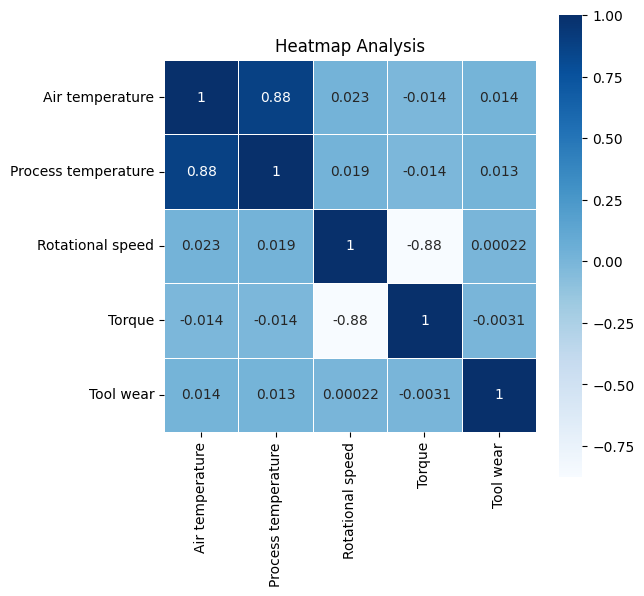

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(data[num_cols].corr(), square = True, annot = True, cmap = 'Blues', linewidths = 0.5)
plt.title("Heatmap Analysis")
plt.show()

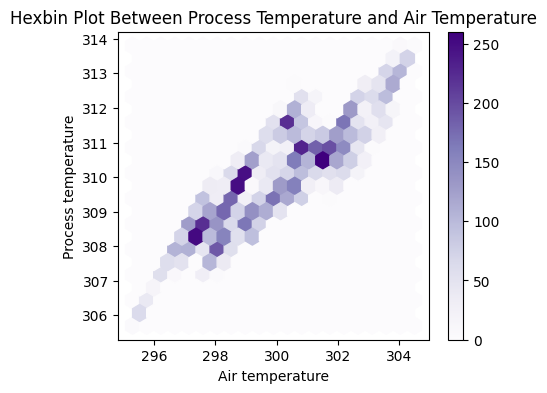

In [ ]:
data.plot.hexbin(x='Air temperature', y='Process temperature', gridsize=20, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Process Temperature and Air Temperature")
plt.show()

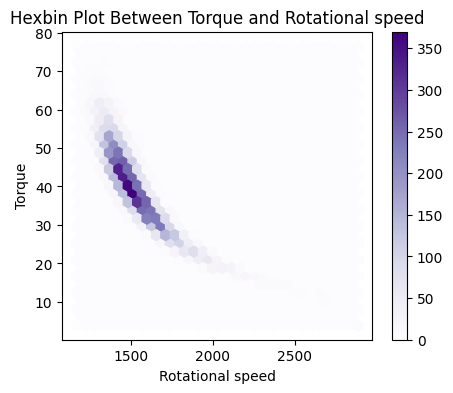

In [ ]:
data.plot.hexbin(x='Rotational speed', y='Torque', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Torque and Rotational speed")
plt.show()

In [ ]:
type_machine_failure = data[['Type', 'Machine failure']].pivot_table(index = 'Type', columns='Machine failure', aggfunc= lambda x: len(x), margins = True)

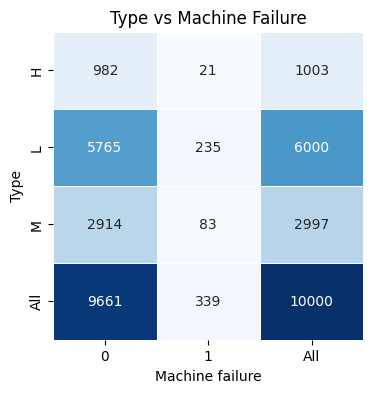

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(type_machine_failure, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Type vs Machine Failure")
plt.show()

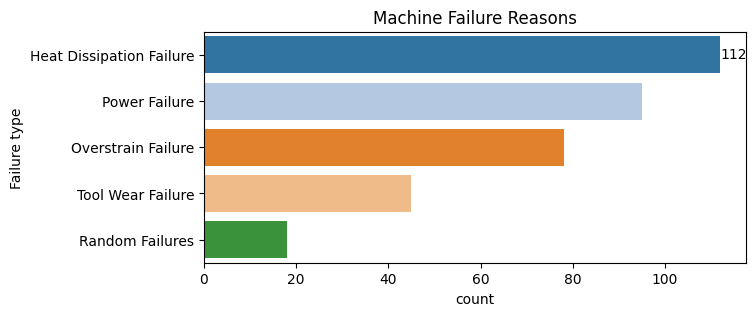

In [ ]:
plt.figure(figsize = (7, 3))
ax = sns.countplot(data[data['Failure type'] != 'No Failure'], y = "Failure type", palette = 'tab20', order=data[data['Failure type'] != 'No Failure']['Failure type'].value_counts().index)
plt.title("Machine Failure Reasons")
ax.bar_label(ax.containers[0])
plt.show()

# Feature Engineering

In [ ]:
data['Power'] = 2 * np.pi * data['Rotational speed'] * data['Torque'] / 60

In [ ]:
data['temp_diff'] = data['Process temperature'] - data['Air temperature']

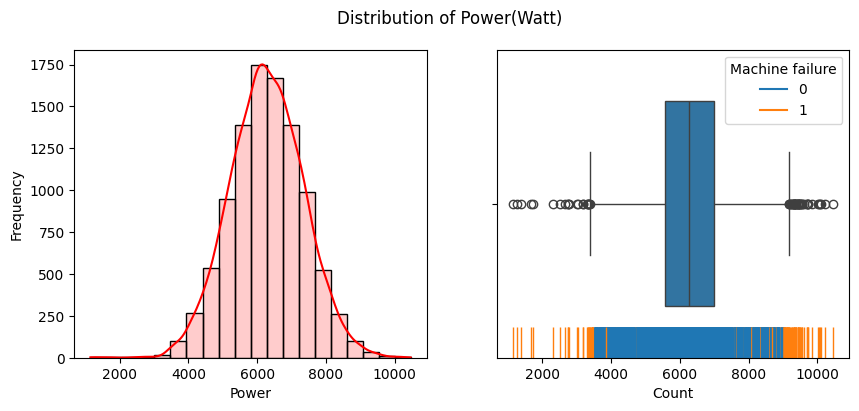

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.histplot(data['Power'], bins = 20, ax = ax[0], color = 'red', alpha = 0.2, kde = True)
ax[0].set_ylabel("Frequency")

sns.boxplot(x = data['Power'], ax = ax[1], width = 0.25)
sns.rugplot(data, x = 'Power', hue = 'Machine failure', ax = ax[1], height = 0.1)
ax[1].set_xlabel("Count")

fig.suptitle("Distribution of Power(Watt)")

fig.show()

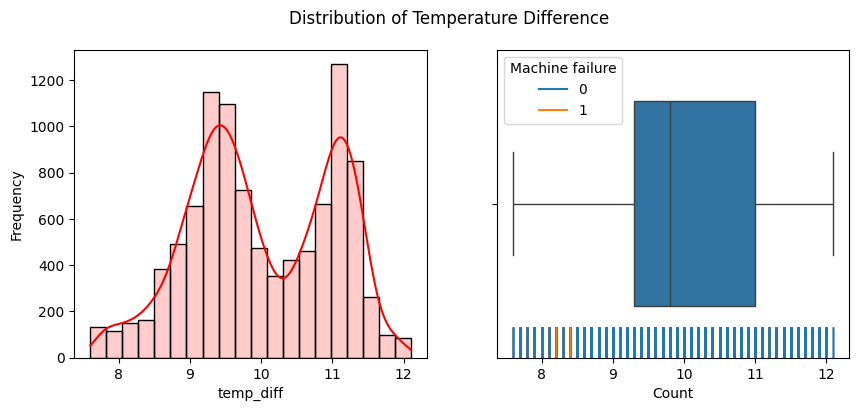

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.histplot(data['temp_diff'], bins = 20, ax = ax[0], color = 'red', alpha = 0.2, kde = True)
ax[0].set_ylabel("Frequency")

sns.boxplot(x = data['temp_diff'], ax = ax[1], width = 0.25)
sns.rugplot(data, x = 'temp_diff', hue = 'Machine failure', ax = ax[1], height = 0.1)
ax[1].set_xlabel("Count")

fig.suptitle("Distribution of Temperature Difference")

fig.show()

# Data Preprocessing

In [ ]:
# UDI and Product ID are high cardinality features, Removing Process Temperature due to multi-collinearity
data = data.drop(['UDI', 'Product ID', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Failure type'], axis = 1)

### One Hot Encoding

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data[['Type_H', 'Type_L', 'Type_M']] = data[['Type_H', 'Type_L', 'Type_M']].astype('int')

In [ ]:
data.head()

,Tool wear,Machine failure,Power,temp_diff,Type_H,Type_L,Type_M
0,0,0,6951.590560,10.5,0,0,1
1,3,0,6826.722724,10.5,0,1,0
2,5,0,7749.387543,10.4,0,1,0
3,7,0,5927.504659,10.4,0,1,0
4,9,0,5897.816608,10.5,0,1,0


# Training Model

In [ ]:
!pip -q install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.9 MB/s eta 0:00:00
   ━━━━

In [ ]:
!pip -q install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 17.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires scipy<=1.11.4,>=1.6.1, but you have scipy 1.15.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.


In [ ]:
!pip -q install --upgrade yellowbrick

In [ ]:
import pycaret
!pip install mljar-scikit-plot

  Preparing metadata (setup.py) ... done
  Created wheel for mljar-scikit-plot: filename=mljar_scikit_plot-0.3.12-py3-none-any.whl size=32014 sha256=dca0d3d39c5fbbc7f82b5742f0c0ee63aedcabc1ea7b9df2bd8be7d2caf922bd
  Stored in directory: /root/.cache/pip/wheels/e2/2d/3e/8afe0632e7b03c3ae7b8048f88f0dcca4355b32d31abaea3ba
Successfully built mljar-scikit-plot


In [ ]:
from pycaret.classification import *

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c7e0bf84f40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.

In [ ]:
s= setup(data, target = 'Machine failure', session_id = 42, data_split_stratify=True)

,Description,Value
0,Session id,42
1,Target,Machine failure
2,Target type,Binary
3,Original data shape,"(10000, 7)"
4,Transformed data shape,"(10000, 7)"
5,Transformed train set shape,"(7000, 7)"
6,Transformed test set shape,"(3000, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9807,0.9693,0.5264,0.8461,0.6412,0.6321,0.6545,0.5570
lightgbm,Light Gradient Boosting Machine,0.9774,0.9575,0.5359,0.7266,0.6111,0.6000,0.6102,0.2480
xgboost,Extreme Gradient Boosting,0.9761,0.9541,0.5272,0.7072,0.5969,0.5850,0.5953,0.1800
ada,Ada Boost Classifier,0.9749,0.9482,0.4636,0.7108,0.5534,0.5412,0.5581,0.6210
rf,Random Forest Classifier,0.9801,0.9467,0.5230,0.8332,0.6302,0.6210,0.6442,0.9460
et,Extra Trees Classifier,0.9750,0.9263,0.3710,0.7888,0.4967,0.4858,0.5255,0.4820
nb,Naive Bayes,0.9711,0.8675,0.1641,0.8967,0.2712,0.2641,0.3667,0.1240
ridge,Ridge Classifier,0.9661,0.8106,0.0000,0.0000,0.0000,0.0000,0.0000,0.1190
lda,Linear Discriminant Analysis,0.9671,0.8106,0.0337,0.6500,0.0637,0.0615,0.1433,0.0300
lr,Logistic Regression,0.9673,0.8102,0.0422,0.6667,0.0785,0.0757,0.1602,1.5540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

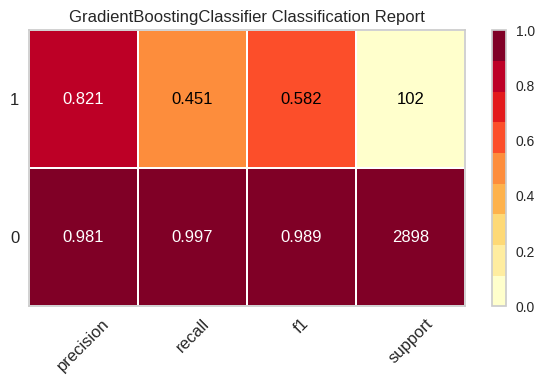

In [ ]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

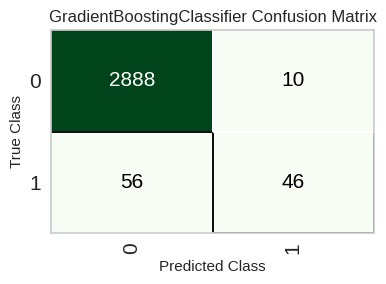

In [ ]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

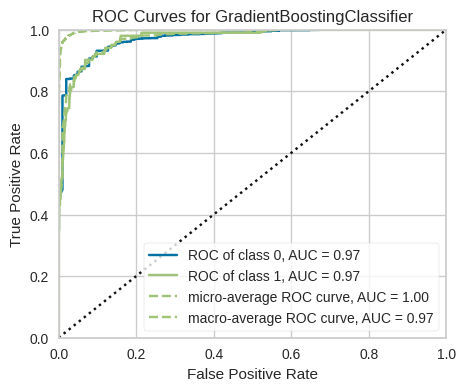

In [ ]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

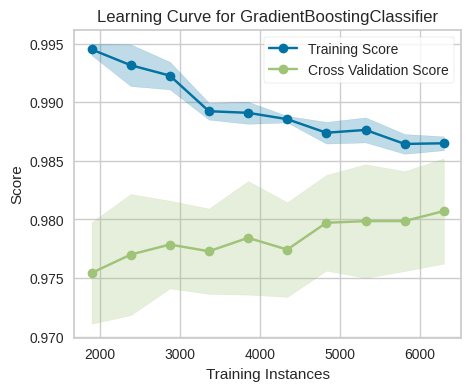

In [ ]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'learning')

# Cost Benefit Analysis

In the absence of specific cost data for this project, a basic cost-benefit analysis is performed using hypothetical values. While these values may not accurately reflect the exact costs associated with false positives and false negatives in this specific project, they can serve as placeholders for the purpose of understanding the concept and methodology of cost-benefit analysis.

## Hypothetical Cost Estimates (in USD):

### Cost of False Positive (Unnecessary Maintenance)

| Cost Type             | Cost Amount             |
|-----------------------|-------------------------|
| Downtime Cost         | \$500 per hour           |
| Labor Cost            | \$200 per maintenance session |
| Replacement Part Cost | \$300 per occurrence     |
| Machine Wear          | \$50 per occurrence      |
| Production Disruption | \$1000 per occurrence    |


### Cost of False Negative (Missed Maintenance Leading to Machine Failure)

| Cost Type                   | Cost Amount                |
|-----------------------------|----------------------------|
| Downtime Cost               | \$2000 per hour            |
| Emergency Repair Cost       | \$1500 per occurrence      |
| Replacement Part Cost       | \$800 per occurrence       |
| Rework Cost                 | \$1000 per occurrence      |
| Customer Satisfaction Loss  | \$5000 per occurrence      |



In [ ]:
# Custom cost-benefit scoring function
def custom_cost_benefit(y_true, y_pred):
    maintenance_cost = 2050
    failure_cost = 10300
    tp = np.where((y_pred==1) & (y_true==1), failure_cost-maintenance_cost, 0)
    fp = np.where((y_pred==1) & (y_true==0), -maintenance_cost, 0)

    # Negative score because PyCaret optimizes for higher values, we want to minimize cost
    score = np.sum([fp, tp])
    return score

# Add custom cost-benefit metric to PyCaret
add_metric('cost_benefit', 'Cost-Benefit', custom_cost_benefit)

,cost_benefit
Name,Cost-Benefit
Display Name,Cost-Benefit
Score Function,<pycaret.internal.metrics.EncodedDecodedLabels...
Scorer,"make_scorer(custom_cost_benefit, response_meth..."
Target,pred
Args,{}
Greater is Better,True
Multiclass,True
Custom,True


In [ ]:
best_model = compare_models(sort = 'Cost-Benefit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Cost-Benefit,TT (Sec)
lr,Logistic Regression,0.9673,0.8102,0.0422,0.6667,0.0785,0.0757,0.1602,0.0000,0.1430
knn,K Neighbors Classifier,0.9769,0.7569,0.3712,0.8720,0.5132,0.5038,0.5552,0.0000,0.0710
nb,Naive Bayes,0.9711,0.8675,0.1641,0.8967,0.2712,0.2641,0.3667,0.0000,0.0310
dt,Decision Tree Classifier,0.9707,0.7710,0.5569,0.5729,0.5586,0.5437,0.5469,0.0000,0.0440
svm,SVM - Linear Kernel,0.9624,0.3755,0.0043,0.1000,0.0083,0.0044,0.0168,0.0000,0.0680
ridge,Ridge Classifier,0.9661,0.8106,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0300
rf,Random Forest Classifier,0.9801,0.9467,0.5230,0.8332,0.6302,0.6210,0.6442,0.0000,1.0160
qda,Quadratic Discriminant Analysis,0.5711,0.5306,0.4326,0.0730,0.0576,0.0099,0.0122,0.0000,0.0300
ada,Ada Boost Classifier,0.9749,0.9482,0.4636,0.7108,0.5534,0.5412,0.5581,0.0000,0.2300
gbc,Gradient Boosting Classifier,0.9807,0.9693,0.5264,0.8461,0.6412,0.6321,0.6545,0.0000,0.7060


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

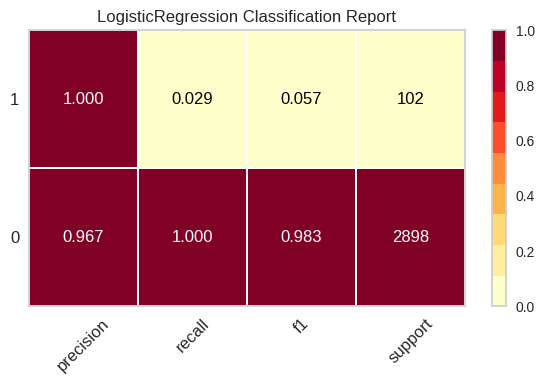

In [ ]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

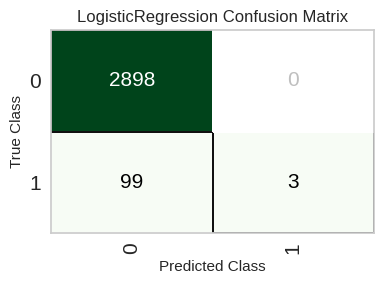

In [ ]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

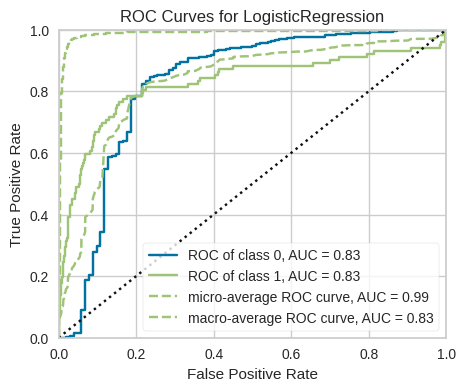

In [ ]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

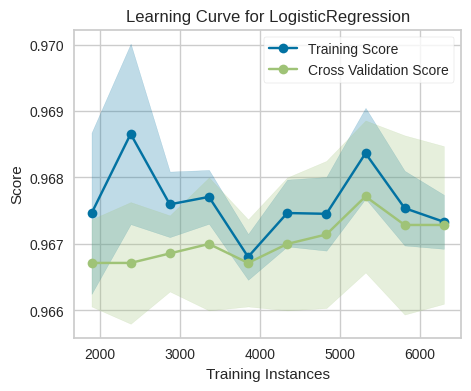

In [ ]:
plt.figure(figsize = (5, 4))
plot_model(best_model, plot = 'learning')

In [ ]:
save_model(best_model, 'predictive_maintenance')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Tool wear', 'Power', 'temp_diff',
                                              'Type_H', 'Type_L', 'Type_M'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclud...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames

In [ ]:
# prompt: Use the predective_maintanence.pkl to test with dummy data

import pandas as pd
from pycaret.classification import load_model, predict_model

# Load the saved model
model = load_model('predictive_maintenance')

# Create dummy data (replace with your actual data)
dummy_data = pd.DataFrame({
    'Type_H': [0],
    'Type_L': [1],
    'Type_M': [0],
    'Tool wear': [10],
    'Power': [10000],
    'temp_diff': [10]
})


# Make predictions
predictions = predict_model(model, data=dummy_data)

predictions

Transformation Pipeline and Model Successfully Loaded


,Type_H,Type_L,Type_M,Tool wear,Power,temp_diff,prediction_label,prediction_score
0,0,1,0,10,10000,10,0,0.8099


In [ ]:
from google.colab import files
files.download('predictive_maintenance.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>